#Connect GPU for this part : Feature Extraction

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
from tensorflow import keras
from keras.utils.image_utils import load_img 
from keras.utils.image_utils import img_to_array
from keras.applications.vgg16 import preprocess_input 

from torchvision.datasets import INaturalist

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [4]:
image_files =[]

In [5]:
img_path = "/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/"
#img_path = "/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClassifier/OOD_Train/Bovidae/"

In [6]:
import os

def traverseDir(folderPath):
 
    for subFolderRoot, foldersWithinSubFolder, files in os.walk(folderPath, topdown=False):
 
        for fileName in files:
            print(os.path.join(subFolderRoot, fileName))
            if "Chordata" in os.path.join(subFolderRoot, fileName):
              image_files.append (os.path.join(subFolderRoot, fileName))
 
        for folderNameWithinSubFolder in foldersWithinSubFolder:
            print(os.path.join(subFolderRoot, folderNameWithinSubFolder))

 
traverseDir(img_path)

Streaming output truncated to the last 5000 lines.
/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/07255_Plantae_Tracheophyta_Magnoliopsida_Brassicales_Brassicaceae_Lepidium_campestre
/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/02041_Animalia_Arthropoda_Insecta_Lepidoptera_Papilionidae_Parnassius_smintheus
/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/01715_Animalia_Arthropoda_Insecta_Lepidoptera_Noctuidae_Thysanoplusia_orichalcea
/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/00922_Animalia_Arthropoda_Insecta_Lepidoptera_Crambidae_Parapoynx_maculalis
/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/05641_Fungi_Basidiomycota_Agaricomycetes_Phallales_Phallaceae_Aseroe_rubra
/gdrive/My Drive/Colab Notebooks/ComputerVision/ImageClustering/animals/2021_valid/01875_Animalia_Arthropoda_Insecta_Lepidoptera_Nymphali

In [7]:
animals = [[f.strip(f.split('/')[-1]),f.split('/')[-1]] for f in  image_files if ".jpg" in f]

In [8]:
len (animals)

24160

In [9]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

553467096/553467096 [==============================] - 4s 0us/step


In [10]:
animals_df = pd.DataFrame (animals)
animals_df ["file"] = animals_df [0] + "/" + animals_df[1]
animals_df = animals_df.drop ([0,1],axis = 1)
animals_df ["model"] = model
animals_df

,file,model
0,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
1,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
2,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
3,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
4,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
...,...,...
24155,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
24156,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
24157,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...
24158,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,<keras.engine.functional.Functional object at ...


In [11]:
counter = 0 

In [12]:
def extract_features_df (df):
    try:
      global counter 
      counter = counter + 1
      #print (df)
      print (counter)
      #print (df ["file"])
      
      # load the image as a 224x224 array
      img = load_img(df ["file"].values [0], target_size=(224,224))
      
      # convert from 'PIL.Image.Image' to numpy array
      img = np.array(img) 
      
      # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
      reshaped_img = img.reshape(1,224,224,3) 
      
      # prepare image for model
      imgx = preprocess_input(reshaped_img)
      
      # get the feature vector
      
      features = model.predict(imgx, use_multiprocessing=True)

      df ["features"] = [features.tolist()[0]]
      
        
      df.to_csv ("/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/hardtoclassify/hardtoclassify_animals_4.1.csv",mode='a',index=False,header=False)
    except :
      print ("error")
      pass
    return df

In [ ]:
apply_df = animals_df.groupby ("file").apply (extract_features_df)

1
1/1 [==============================] - 7s 7s/step
2
1/1 [==============================] - 0s 20ms/step
3
1/1 [==============================] - 0s 20ms/step
4
1/1 [==============================] - 0s 24ms/step
5
1/1 [==============================] - 0s 19ms/step
6
1/1 [==============================] - 0s 19ms/step
7
1/1 [==============================] - 0s 22ms/step
8
1/1 [==============================] - 0s 22ms/step
9
1/1 [==============================] - 0s 19ms/step
10
error
11
1/1 [==============================] - 0s 25ms/step
12
1/1 [==============================] - 0s 19ms/step
13
1/1 [==============================] - 0s 21ms/step
14
1/1 [==============================] - 0s 21ms/step
15
1/1 [==============================] - 0s 21ms/step
16
1/1 [==============================] - 0s 19ms/step
17
1/1 [==============================] - 0s 22ms/step
18
1/1 [==============================] - 0s 20ms/step
19
1/1 [==============================] - 0s 21ms/step
20
1/1 [====

# Make Sure to connect to TPU (it won't work with CPU or GPU)

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [2]:
!pip install k-means-constrained 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 KB 19.4 MB/s eta 0:00:00
  Created wheel for k-means-constrained: filename=k_means_constrained-0.7.2-cp39-cp39-linux_x86_64.whl size=2003147 sha256=071b41436961d57095ff23957037d7194832342f5e72c4e294e83cd5773bdd6a
  Stored in directory: /root/.cache/pip/wheels/51/40/52/9e1bf6cea6d18c62a4dce6a797ebff6698094d1d3bdb0a0515
Successfully built k-means-constrained
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency reso

In [3]:
from k_means_constrained import KMeansConstrained
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
                [4, 2], [4, 4], [4, 0]])
clf = KMeansConstrained(
     n_clusters=2,
     size_min=2,
     size_max=5,
     random_state=0
 )

In [4]:
import pandas as pd 
import numpy as np

In [5]:
from sklearn.decomposition import PCA

In [6]:
apply_df_path = "/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/hardtoclassify/hardtoclassify_animals_4.csv"

In [7]:
apply_df = pd.read_csv (apply_df_path,header=None,names = ['file', 'model', 'features']).drop('model',axis=1)
apply_df

,file,features
0,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.7469325065612793, 0.0, 0.64493680..."
1,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.07706683874130249, 0.0, 0.9010466..."
2,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7894616127014..."
3,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.07317423820495605, 1.800889492034912, ..."
4,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.2385675609111786, 0.0, 0.0, 0.51158469..."
...,...,...
51746,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.06371617317199707, 0.0, 0.0, 0.61..."
51747,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.0, 0.03593030571937561, 1.3808867..."
51748,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.0, 0.47661247849464417, 4.2638673..."
51749,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.0, 0.0, 1.60609769821167, 1.56698..."


In [8]:
apply_df ["species"] = apply_df ["file"].apply (lambda x : x.split("/") [-3].split ("_") [2])
apply_df

,file,features,species
0,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.7469325065612793, 0.0, 0.64493680...",Annelida
1,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.07706683874130249, 0.0, 0.9010466...",Annelida
2,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7894616127014...",Annelida
3,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.07317423820495605, 1.800889492034912, ...",Annelida
4,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.2385675609111786, 0.0, 0.0, 0.51158469...",Annelida
...,...,...,...
51746,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.06371617317199707, 0.0, 0.0, 0.61...",Chordata
51747,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.0, 0.03593030571937561, 1.3808867...",Chordata
51748,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.0, 0.47661247849464417, 4.2638673...",Chordata
51749,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.0, 0.0, 1.60609769821167, 1.56698...",Chordata


In [9]:
c = apply_df ["species"] == "Chordata"
apply_df = apply_df [c]
apply_df

,file,features,species
30536,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.7221407890319824, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Chordata
30537,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.268...",Chordata
30538,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.9807047843933105, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Chordata
30539,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.99882340...",Chordata
30540,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Chordata
...,...,...,...
51746,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.06371617317199707, 0.0, 0.0, 0.61...",Chordata
51747,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.0, 0.03593030571937561, 1.3808867...",Chordata
51748,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.0, 0.47661247849464417, 4.2638673...",Chordata
51749,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,"[0.0, 0.0, 0.0, 0.0, 1.60609769821167, 1.56698...",Chordata


In [10]:
def convert_string_to_float (feat_str):
    x =  feat_str.split(",")
    y = []
    y.append (float (x [0] [1:]))
    for i in x [1:-1]  : y.append ( float (i) ) 
    y.append ( float (x [-1] [:-1]) )
    return y

In [11]:
apply_df ["features1"] = apply_df ["features"].apply (lambda x : convert_string_to_float (x) )

<ipython-input-11-8e1dcd7f7a78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apply_df ["features1"] = apply_df ["features"].apply (lambda x : convert_string_to_float (x) )


In [12]:
apply_df = apply_df.drop ("features",axis =1 )

In [13]:
feat = np.array(list(apply_df.features1.values))
feat.shape

(21215, 4096)

In [14]:
# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape

(21215, 4096)

In [15]:
pca = PCA(n_components=50, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [16]:
del (feat)

In [17]:
del (pca)

In [18]:
kmeans = KMeansConstrained(n_clusters= 10, random_state=22 , size_min = 2000)
kmeans.fit(x)

KMeansConstrained(copy_x=True, init='k-means++', max_iter=300, n_clusters=10,
         n_init=10, n_jobs=1, random_state=22, size_max=None,
         size_min=2000, tol=0.0001, verbose=False)

In [19]:
apply_df ["cluster"] = kmeans.labels_

In [20]:
apply_df = apply_df.reset_index().drop('index',axis = 1)

In [21]:
apply_df = apply_df.join (pd.DataFrame (kmeans.transform(x)))

In [22]:
apply_df

,file,species,features1,cluster,0,1,2,3,4,5,6,7,8,9
0,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,Chordata,"[0.7221407890319824, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,59.453012,65.886010,48.994703,61.063413,65.289968,46.183314,69.066647,61.141884,63.560047,73.299983
1,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,Chordata,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.268...",5,52.741152,69.535279,53.584332,66.033009,63.733118,48.772238,72.816171,58.389104,69.828790,74.969575
2,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,Chordata,"[0.9807047843933105, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,58.419576,68.627049,50.005173,59.956624,63.175502,46.277509,73.448018,57.900893,67.876780,76.216872
3,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,Chordata,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.99882340...",0,50.183993,68.530715,57.988711,67.421583,65.603875,60.607851,70.766389,60.598783,67.203688,74.064147
4,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,Chordata,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,51.479586,61.701348,47.668398,58.022981,60.949938,44.100127,63.621738,56.799320,60.025340,67.014285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21210,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,Chordata,"[0.0, 0.0, 0.06371617317199707, 0.0, 0.0, 0.61...",0,64.805392,83.567827,77.591465,87.305394,82.671815,81.443972,85.888831,79.214779,83.798757,86.786188
21211,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,Chordata,"[0.0, 0.0, 0.0, 0.03593030571937561, 1.3808867...",2,45.794819,47.597809,37.372552,54.461171,49.868120,52.949041,56.923412,42.293022,52.342819,57.843103
21212,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,Chordata,"[0.0, 0.0, 0.0, 0.47661247849464417, 4.2638673...",0,51.920963,62.412686,58.063478,71.216140,64.281100,64.511289,70.298846,55.013256,65.297529,70.637243
21213,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,Chordata,"[0.0, 0.0, 0.0, 0.0, 1.60609769821167, 1.56698...",0,46.448321,66.802688,62.854763,76.993446,72.913687,66.628559,70.882193,69.360417,69.745112,73.323400


In [23]:
out_cluster_path = "/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/hardtoclassify/hardtoclassify_animals_4_clustered_Chordata.csv"

In [24]:
#apply_df.to_csv (out_cluster_path,index=False)

#Restart Run-Time (or Terminate session) before running this section

In [5]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [12]:
import pandas as pd
import numpy as np

In [7]:
out_cluster_path = "/gdrive/MyDrive/Colab Notebooks/ComputerVision/ImageClustering/hardtoclassify/hardtoclassify_animals_4_clustered_Chordata.csv"

In [14]:
data = pd.read_csv (out_cluster_path)
data.head()

,Unnamed: 0,file,species,features1,cluster,0,1,2,3,4,5,6,7,8,9
0,0,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,Chordata,"[0.7221407890319824, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,59.453012,65.886010,48.994703,61.063413,65.289968,46.183314,69.066647,61.141884,63.560047,73.299983
1,1,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,Chordata,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.268...",5,52.741152,69.535279,53.584332,66.033009,63.733118,48.772238,72.816171,58.389104,69.828790,74.969575
2,2,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,Chordata,"[0.9807047843933105, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,58.419576,68.627049,50.005173,59.956624,63.175502,46.277509,73.448018,57.900893,67.876780,76.216872
3,3,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,Chordata,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.99882340...",0,50.183993,68.530715,57.988711,67.421583,65.603875,60.607851,70.766389,60.598783,67.203688,74.064147
4,4,/gdrive/My Drive/Colab Notebooks/ComputerVisio...,Chordata,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,51.479586,61.701348,47.668398,58.022981,60.949938,44.100127,63.621738,56.799320,60.025340,67.014285


In [ ]:
data ["species1"] = data ["file"].apply (lambda x : x.split("/") [-3].split ("_") [4])

In [ ]:
data [["file" , "cluster" , "species","species1"]].groupby (["cluster","species","species1"]).agg ("count")    [data [["file" , "cluster" , "species","species1"]].groupby (["cluster","species","species1"]).agg ("count") ['file'] >100].loc [[2,7]]

In [ ]:
c1 = data ["cluster"] != 2 
c2 = data ["cluster"] != 7 
c3 = data ["species"] == "Aves"
c4 = data ["species1"] != "Passeriformes" #*********
c  = c1 & c2 & c3 & c4 
data_da = data.copy() [c]  # da : for Domain Adaptation

In [ ]:
data_da [["file" , "cluster" , "species","species1"]].groupby (["cluster","species","species1"]).agg ("count")    [data_da [["file" , "cluster" , "species","species1"]].groupby (["cluster","species","species1"]).agg ("count") ['file'] >100]

In [9]:
c_n = 0 # specified cluster number you want to investigate
c = data ["cluster"] == c_n
filenames = data [c].sort_values (str(c_n)) ["file"].values.tolist()
labels    = data [c].sort_values (str(c_n)) ["cluster"].values.tolist()
g         = data [c] .sort_values (str(c_n)) [str(c_n)].values.tolist()
i         = [i for i in range (data [c].shape[0])]
j         = [i for i in range (data [c].shape[0])]
species   =  data [c].sort_values (str(c_n)) ["species"].values.tolist()
top_df = pd.DataFrame (data = {"p":filenames,
                      "s":species,
                      "g":g,
                      "i":i,
                      "j":j})


In [10]:
from warnings import filterwarnings
from keras.utils.image_utils import load_img 
import tensorflow as tf
from tensorflow import io
from tensorflow import image
from matplotlib import pyplot as plt


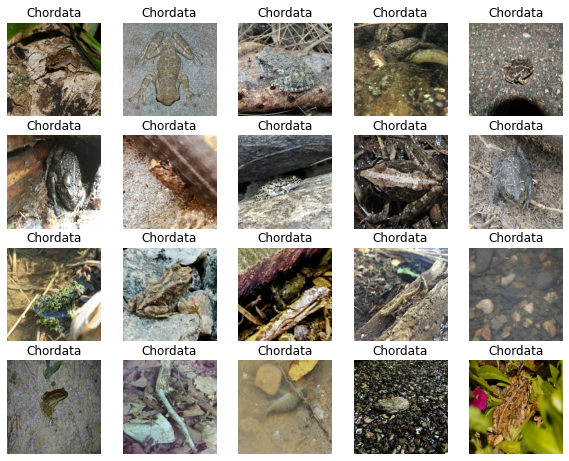

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(20):
  img = load_img(top_df.p.values.tolist()[i], target_size=(224,224))
  #print (top_df.index.tolist()[i], groups[cluster_no] [top_df.index.tolist()[i]])
  # convert from 'PIL.Image.Image' to numpy array
  #img = np.array(img)
  #ax = plt.subplot(3, 3, i + 1)
  ax = plt.subplot(5, 5 ,i+1)
  plt.imshow(np.array(img).astype("uint8"))
  plt.title( top_df.s.tolist() [i] )
  #plt.title(groups[cluster_no] [top_df.index.tolist()[i]] [1] [cluster_no])
  plt.axis("off")